<a href="https://colab.research.google.com/github/Karnis052/ML/blob/main/cat%26dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cat and dog classification from 'Deep Learning with python' book

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
inputs= keras.Input(shape = (28,28, 1))
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(inputs)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation  = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation  = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = "softmax")(x)

model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f" train image shape: {train_images.shape}")
print(f" test image shape: {test_images.shape}")

11490434/11490434 [==============================] - 2s 0us/step
 train image shape: (60000, 28, 28)
 test image shape: (10000, 28, 28)


In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32")/255

In [ ]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"]
              )

In [ ]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.1285 - accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0415 - accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0287 - accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0233 - accuracy: 0.9934
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0197 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0159 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0142 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0133 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0120 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9902
test accuracy: 0.9901999831199646


In [ ]:
!wget https://www.dropbox.com/s/kc77yps787sqt92/kaggle.json 

--2023-02-05 13:36:48--  https://www.dropbox.com/s/kc77yps787sqt92/kaggle.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/kc77yps787sqt92/kaggle.json [following]
--2023-02-05 13:36:48--  https://www.dropbox.com/s/raw/kc77yps787sqt92/kaggle.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc30f527e83deeae664aa00bac09.dl.dropboxusercontent.com/cd/0/inline/B16rO3B3vQhNgKbTKJjPhpv-Dqe13mi12qbnTWR1c6DyUeOHv3dF1zdIEVs9daOJ2ORydggmi8fdmX8IaIgoEabC9Mwq3Gf9hV9IAJNK5tHOeDWTB3ccaYjx3qtWK4fo1TBt-S_pWxdaxLHLy-Pk-Qgp1cMgMC2il2o433mmHp9XHA/file# [following]
--2023-02-05 13:36:48--  https://uc30f527e83deeae664aa00bac09.dl.dropboxusercontent.com/cd/0/inline/B16rO3B3vQhNgKbTKJjPhpv-Dqe13mi12qbnTWR1c6DyUeOHv3dF1zdIEVs9daOJ2ORydggmi8fdmX8I

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:36<00:00, 24.9MB/s]
100% 812M/812M [00:36<00:00, 23.4MB/s]


In [ ]:
import os 
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_ref.extractall("/content/dogs-vs-cats")
zip_ref.close()

In [ ]:
!unzip --qq /content/dogs-vs-cats/train.zip

In [ ]:
!unzip --qq /content/dogs-vs-cats/test1.zip

In [ ]:
len(os.listdir("/content/train"))

25000

In [ ]:
len(os.listdir("/content/test1"))

12500

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir/subset_name/category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"  for i in range(start_index, end_index) ]
    
    for fname in fnames:
      shutil.copyfile(src=original_dir/fname, dst = dir/fname)

make_subset("train", start_index =0, end_index = 1000)
make_subset("validation", start_index = 1000, end_index = 1500)
make_subset("test", start_index = 1500, end_index = 2500)

(374, 500, 3)


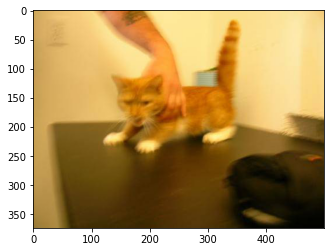

In [ ]:
img_path =os.path.join('./cats_vs_dogs_small/train/cat/cat.0.jpg')
img = plt.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.show()

In [ ]:
# Instantiating small convnet for dogs vs cats classification

inputs = keras.Input(shape= (180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation ="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
# using image_dataset_from_directory to read_images
train_dataset = image_dataset_from_directory(
    new_base_dir/"train",
    image_size = (180, 180),
    batch_size = 32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir/"validation",
    image_size = (180, 180),
    batch_size = 32
)

test_dataset = image_dataset_from_directory(
    new_base_dir/"test",
    image_size = (180, 180),
    batch_size = 32
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape: ", data_batch.shape)
  print("labels batch shape: ", labels_batch.shape)
  break

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "convnet_from_scratch.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks =callbacks

)

Epoch 1/30
63/63 [==============================] - 7s 88ms/step - loss: 0.6944 - accuracy: 0.5060 - val_loss: 0.6918 - val_accuracy: 0.5610
Epoch 2/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6803 - accuracy: 0.5435 - val_loss: 0.6855 - val_accuracy: 0.5370
Epoch 3/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6661 - accuracy: 0.5900 - val_loss: 0.6666 - val_accuracy: 0.5680
Epoch 4/30
63/63 [==============================] - 5s 79ms/step - loss: 0.6345 - accuracy: 0.6390 - val_loss: 0.6466 - val_accuracy: 0.6260
Epoch 5/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6222 - accuracy: 0.6360 - val_loss: 0.6528 - val_accuracy: 0.6290
Epoch 6/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6173 - accuracy: 0.6545 - val_loss: 0.6415 - val_accuracy: 0.6300
Epoch 7/30
63/63 [==============================] - 4s 64ms/step - loss: 0.5851 - accuracy: 0.6835 - val_loss: 0.5965 - val_accuracy: 0.6730
Epoch 8/30
63

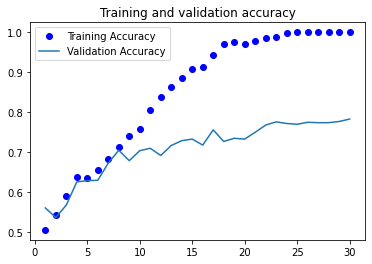

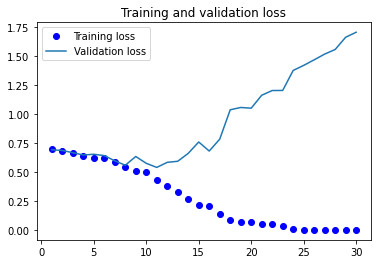

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss)+1)
plt.plot(epochs, accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs, val_accuracy, label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.legend()


In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"test accuracy")

63/63 [==============================] - 3s 47ms/step - loss: 0.5539 - accuracy: 0.7155
test accuracy


# Define a data augmentation stage to add to an image model

In [ ]:
data_augmentation = keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.2)
     
    ]
)

(32, 180, 180, 3)


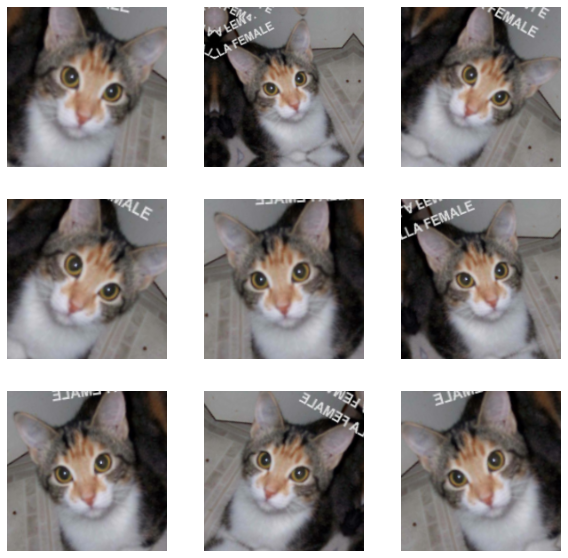

In [ ]:
# Display some randomly augmented images
plt.figure(figsize= (10,10))
for images, _ in train_dataset.take(1): # take(N) -> This is equivalent to insert a break after N batch
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis('off')
print(augmented_images.shape)

# Defining a new convnet that includes image augmentation and dropout

In [ ]:
inputs = keras.Input(shape = (180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size =3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size =3, activation ="relu")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    loss = "binary_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]

)

# Trainig the regularized convnet

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "convnet_from_scratch_with_augmentation.keras",
        save_best_only = True,
        monitor= "val_loss"
    )
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs = 70,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/70
63/63 [==============================] - 7s 94ms/step - loss: 0.7432 - accuracy: 0.5240 - val_loss: 0.6922 - val_accuracy: 0.5720
Epoch 2/70
63/63 [==============================] - 7s 106ms/step - loss: 0.7113 - accuracy: 0.5375 - val_loss: 0.6872 - val_accuracy: 0.5800
Epoch 3/70
63/63 [==============================] - 6s 91ms/step - loss: 0.7141 - accuracy: 0.5715 - val_loss: 0.6341 - val_accuracy: 0.6510
Epoch 4/70
63/63 [==============================] - 6s 93ms/step - loss: 0.6823 - accuracy: 0.6070 - val_loss: 0.6314 - val_accuracy: 0.6440
Epoch 5/70
63/63 [==============================] - 6s 92ms/step - loss: 0.6485 - accuracy: 0.6260 - val_loss: 0.6339 - val_accuracy: 0.6290
Epoch 6/70
63/63 [==============================] - 7s 104ms/step - loss: 0.6317 - accuracy: 0.6490 - val_loss: 0.6560 - val_accuracy: 0.5910
Epoch 7/70
63/63 [==============================] - 6s 89ms/step - loss: 0.6094 - accuracy: 0.6835 - val_loss: 0.5966 - val_accuracy: 0.6550
Epoch 8/70


# Evaluating model on the test set 

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

63/63 [==============================] - 2s 34ms/step - loss: 0.4542 - accuracy: 0.8205
Test accuracy: 0.8205000162124634


# Leveraging a pretained model
Some pretained models are   VGG16, VGG, ResNet,MobileNet, EfficientNet, DenseNet, Inception, Xception and so on

There are two ways to use a pretrained model
1. feature extraction
2. fine-tuning

# Feature extraction with a pretained model

In [ ]:
keras.applications

<module 'keras.api._v2.keras.applications' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/applications/__init__.py'>

## Instantiating the VGG16 convolutional base



In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False,
    input_shape = (180, 180, 3)
)

# We pass three arguments to the constructor:
# weights  specifies weight checkpoint from which to initialize the model
# include_top  refers to including (or not ) the densely connected classifier on the top of the network

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

The final feature map has shape(5,5, 512). On the of this feature we'll stick a densly connected classifier. There is two to prceed 
1. Run the convolutional base over out dataset, record its output to a Numpy array on disk, and then use this data as input to a standalone, densely connected classifier. <font color = 'red '>Note: this technique won't allow to use data augmentation  </font>

2.  Extended model we have by adding Dense layers on the top of convolutional base, run the whole thing from end to end on the input data. This will allow to use data augmentation, because every input image goes through the convolutional base every time it's seen by the model.That's why it takes more time.

### Fast feature extraction without data augmentation.

#### Extracting the VGG16 features and corresponding labels

In [ ]:
def get_features_and_labels(dataset):
  all_features =[]
  all_labels =[]
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

In [ ]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)


1/1 [==============================] - 0s 28ms/step


####  Defining and training the densely connected classifier

In [ ]:
inputs = keras.Input(shape = (5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile( 
    loss = "binary_crossentropy",
    optimizer ='rmsprop',
    metrics = ["accuracy"]
  )

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath ="feature.extraction.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
history = model.fit(
    train_features, train_labels,
    epochs = 20,
    validation_data= [val_features, val_labels],
    callbacks = callbacks
)

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 17.0909 - accuracy: 0.9230 - val_loss: 3.4525 - val_accuracy: 0.9750
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 4.1316 - accuracy: 0.9730 - val_loss: 5.5225 - val_accuracy: 0.9700
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.7212 - accuracy: 0.9845 - val_loss: 8.9776 - val_accuracy: 0.9610
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.5668 - accuracy: 0.9865 - val_loss: 5.5932 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9065 - accuracy: 0.9925 - val_loss: 5.5139 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9119 - accuracy: 0.9935 - val_loss: 4.9843 - val_accuracy: 0.9770
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.4503 - accuracy: 0.9980 - val_loss: 5.2988 - val_accuracy: 0.9730
Epoch 8/20
63/63 [

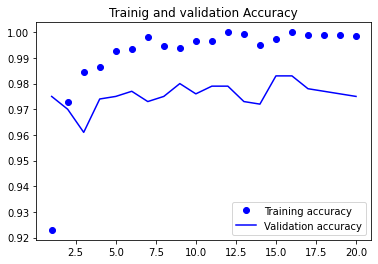

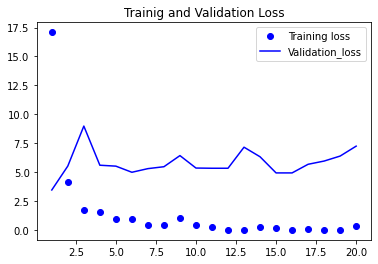

In [ ]:
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history["val_loss"]
epochs =range(1, len(acc)+1)
plt.plot(epochs, acc, "bo", label ="Training accuracy")
plt.plot(epochs, val_acc, 'b', label ="Validation accuracy")
plt.title("Trainig and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation_loss")
plt.title("Trainig and Validation Loss")
plt.legend()
plt.show()



## Feature extraction together with data augmentation

### Instantiating and freezing the VGG16 convolution base

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False
)
conv_base.trainable = False

#### Printing the list of trainable weights before and after training

In [ ]:
from tensorflow.python.ops.variables import trainable_variables
conv_base.trainable = True
print ("The number of trainable weighs before freezing the conv_base: " ,len(conv_base.trainable_weights))

conv_base.trainable = False
print ("The number of trainable weighs after freezing the conv_base: " ,len(conv_base.trainable_weights))

The number of trainable weighs before freezing the conv_base:  26
The number of trainable weighs after freezing the conv_base:  0


#### Adding data augmentation stage and a classifier to the convolutional base
<font color= green>We create mode that chain together
  1. data augmentation stage 
  2. frozen convolution base
  3. dense classifier

</font>


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

In [ ]:
inputs = keras.Input(shape = (180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)  # apply input value scaling
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_2   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_2 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_6 (Flatten)         (None, 12800)             0   

In [ ]:
model.compile( 
    loss = "binary_crossentropy",
    optimizer ='rmsprop',
    metrics = ["accuracy"]
  )

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath ="feature_extraction_with_data_augmentation.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs  = 40,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/40
63/63 [==============================] - 14s 200ms/step - loss: 19.4533 - accuracy: 0.8895 - val_loss: 5.3444 - val_accuracy: 0.9600
Epoch 2/40
63/63 [==============================] - 13s 198ms/step - loss: 9.1139 - accuracy: 0.9370 - val_loss: 2.3998 - val_accuracy: 0.9780
Epoch 3/40
63/63 [==============================] - 12s 195ms/step - loss: 5.3584 - accuracy: 0.9515 - val_loss: 2.7199 - val_accuracy: 0.9770
Epoch 4/40
63/63 [==============================] - 12s 194ms/step - loss: 5.0867 - accuracy: 0.9655 - val_loss: 4.7861 - val_accuracy: 0.9670
Epoch 5/40
63/63 [==============================] - 12s 190ms/step - loss: 3.6340 - accuracy: 0.9645 - val_loss: 3.8763 - val_accuracy: 0.9710
Epoch 6/40
63/63 [==============================] - 13s 198ms/step - loss: 3.7831 - accuracy: 0.9670 - val_loss: 2.3979 - val_accuracy: 0.9800
Epoch 7/40
63/63 [==============================] - 12s 195ms/step - loss: 3.0907 - accuracy: 0.9745 - val_loss: 3.6138 - val_accuracy: 0.971

### Evalaating the 'Feature extraction together with data augmentation' model on the test set

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:0.3f}")

63/63 [==============================] - 7s 108ms/step - loss: 2.4163 - accuracy: 0.9755
Test accuracy: 0.975


# Fine Tuning a pretained model

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## Freezing all layers untill the fourth from the last.
We'll fine-tune the last three convolutional layers, which means all layers up to ```block4_pool``` should be frozen

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False

## Fine- tuning the model


In [ ]:
model.compile( 
    loss = "binary_crossentropy",
    optimizer =  keras.optimizers.RMSprop(learning_rate = 1e-5),
    metrics = ["accuracy"]
)
  

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath ="fine_tuning.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs  = 60,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/60
63/63 [==============================] - 15s 221ms/step - loss: 0.6761 - accuracy: 0.9890 - val_loss: 1.1247 - val_accuracy: 0.9850
Epoch 2/60
63/63 [==============================] - 14s 213ms/step - loss: 0.4052 - accuracy: 0.9925 - val_loss: 2.4852 - val_accuracy: 0.9710
Epoch 3/60
63/63 [==============================] - 14s 221ms/step - loss: 0.5836 - accuracy: 0.9860 - val_loss: 1.0575 - val_accuracy: 0.9850
Epoch 4/60
63/63 [==============================] - 14s 214ms/step - loss: 0.3643 - accuracy: 0.9915 - val_loss: 1.1718 - val_accuracy: 0.9840
Epoch 5/60
63/63 [==============================] - 14s 218ms/step - loss: 0.1444 - accuracy: 0.9960 - val_loss: 0.9701 - val_accuracy: 0.9830
Epoch 6/60
63/63 [==============================] - 14s 215ms/step - loss: 0.1679 - accuracy: 0.9940 - val_loss: 1.5360 - val_accuracy: 0.9800
Epoch 7/60
63/63 [==============================] - 14s 215ms/step - loss: 0.1999 - accuracy: 0.9945 - val_loss: 1.6773 - val_accuracy: 0.9790

In [ ]:
test_model = keras.models.load_model(
    "fine_tuning.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:0.3f}")

63/63 [==============================] - 7s 108ms/step - loss: 1.9116 - accuracy: 0.9780
Test accuracy: 0.978


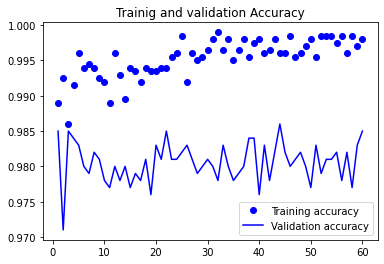

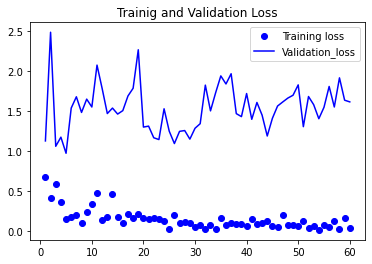

In [ ]:
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history["val_loss"]
epochs =range(1, len(acc)+1)
plt.plot(epochs, acc, "bo", label ="Training accuracy")
plt.plot(epochs, val_acc, 'b', label ="Validation accuracy")
plt.title("Trainig and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation_loss")
plt.title("Trainig and Validation Loss")
plt.legend()
plt.show()